# Add Observability to PaddleOCR by HiQ

The following main.py code is from PaddleOCR's official website [chinese-english-model-and-multilingual-model](https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.4/doc/doc_en/quickstart_en.md#221-chinese--english-model-and-multilingual-model)


- The original code is `main.py`

In [1]:
!cat main.py

import os
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image

here = os.path.dirname(os.path.realpath(__file__))

def main():
    ocr = PaddleOCR(use_angle_cls=True, lang='en')
    img_path = f'{here}/img_12.jpg'
    result = ocr.ocr(img_path, cls=True, rec=True)
    image = Image.open(img_path).convert('RGB')
    boxes = [line[0] for line in result]
    txts = [line[1][0] for line in result]
    scores = [line[1][1] for line in result]
    im_show = draw_ocr(image, boxes, txts, scores, font_path=f'{here}/simfang.ttf')
    im_show = Image.fromarray(im_show)
    im_show.save('result.jpg')

if __name__ == "__main__":
    main()


- We can use HiQ to run the code and get the latency profile in HiQ format

In [2]:
import hiq
from hiq.framework.paddleocr import PaddleOcrHiQLatency

driver = PaddleOcrHiQLatency()
hiq.mod("main").main()
driver.show()

[2022/04/10 00:36:34] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/ubuntu/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/ubuntu/.paddleocr/whl/det/en/en_ppocr_mobile_v2.0_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=

We can see the details of the PaddleOCR model running latencies. Recognition model took most of the time because it ran twice and it is slow for each `paddle_run`. Detection model is not fast either, since one `paddle_run` took 20.96% of the total running time.

- Save HiQ tree as a call graph with max-latency node in `yellow` color

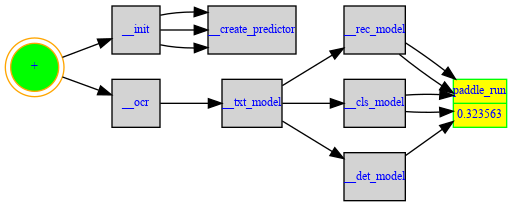

In [3]:
from hiq import KEY_LATENCY
from IPython.display import Image
t = driver.get_metrics(metrics_key=KEY_LATENCY)[0]
Image(t.to_img())

- Save HiQ tree as a Gantt Chart

'/tmp/tim_17dcx6rm4dlg.png'

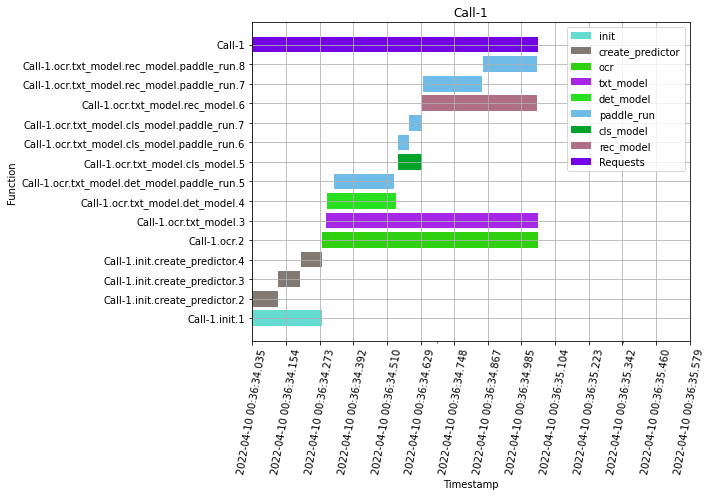

In [4]:
from hiq.utils import create_gantt_chart_time
create_gantt_chart_time(t.repr())